In [74]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from custom_scripts import database
from custom_scripts import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sample_number = 1000
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-03-11,WN,WN,WN,3328,WN,N442WN,3328,15304,TPA,...,1075.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-01-14,G4,G4,G4,430,G4,886GA,430,12889,LAS,...,345.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
2,2018-04-01,NK,NK,NK,163,NK,N530NK,163,10397,ATL,...,946.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-08-16,AS,AS,AS,233,AS,N323AS,233,11298,DFW,...,1660.0,0.0,13.0,3.0,0.0,0.0,None,NaN,NaN,None
4,2019-06-26,UA,UA,UA,2022,UA,N69804,2022,14843,SJU,...,1571.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [83]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [84]:
DelayDate = flights[["fl_date","arr_delay","crs_elapsed_time"]]
DelayDate = DelayDate.fillna(0)

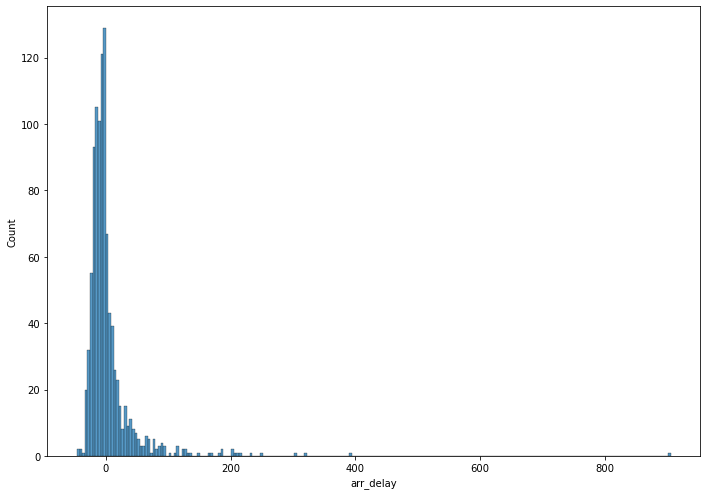

In [85]:
sns.histplot(data=DelayDate, x="arr_delay")
plt.show()

In [86]:
# There are some outliers to be taken care of! 

In [87]:
from scipy import stats
shapiro_test = stats.shapiro(DelayDate.arr_delay.to_numpy())
print(shapiro_test)

ShapiroResult(statistic=0.4625069499015808, pvalue=0.0)


In [88]:
stats.ttest_1samp(DelayDate.arr_delay.to_numpy(), 0)

Ttest_1sampResult(statistic=2.9833062585964387, pvalue=0.0029208317364086776)

In [91]:
outliers_filters = flights["arr_delay"]>=200
outliers = flights[outliers_filters]
outliers.shape

(11, 42)

In [92]:
outliers

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
207,2019-01-14,AA,AA_CODESHARE,AA,4321,YX,N406YX,4321,12953,LGA,...,214.0,0.0,0.0,0.0,0.0,302.0,None,NaN,NaN,None
268,2019-08-14,UA,UA,UA,511,UA,N12754,511,12264,IAD,...,1362.0,205.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
269,2019-05-13,UA,UA_CODESHARE,UA,4732,AX,N24128,4732,12156,HLN,...,594.0,4.0,0.0,0.0,0.0,245.0,None,NaN,NaN,None
373,2019-01-18,UA,UA_CODESHARE,UA,6024,YV,N89304,6024,11193,CVG,...,871.0,217.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
586,2019-08-10,AA,AA,AA,1867,AA,N554UW,1867,14893,SMF,...,647.0,0.0,0.0,0.0,0.0,212.0,None,NaN,NaN,None
792,2019-12-01,UA,UA,UA,422,UA,N12114,422,15304,TPA,...,997.0,0.0,0.0,205.0,0.0,0.0,None,NaN,NaN,None
804,2019-01-27,DL,DL_CODESHARE,DL,5840,CP,N614CZ,5840,14107,PHX,...,370.0,898.0,0.0,7.0,0.0,0.0,None,NaN,NaN,None
830,2019-11-22,AA,AA_CODESHARE,AA,5015,OH,N710PS,5015,11267,DAY,...,477.0,231.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
853,2018-08-29,DL,DL_CODESHARE,DL,5152,9E,N8891A,5152,10397,ATL,...,143.0,0.0,385.0,8.0,0.0,0.0,None,NaN,NaN,None
861,2019-04-19,DL,DL,DL,2786,DL,N306DN,2786,12953,LGA,...,502.0,10.0,0.0,0.0,0.0,309.0,None,NaN,NaN,None


In [95]:
outliers.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_add_gtime,longest_add_gtime
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,0.0,0.0
mean,3861.454545,3861.454545,12943.636364,12433.545455,1325.000000,1412.363636,316.454545,15.636364,1431.636364,1562.545455,...,89.090909,1.0,595.454545,142.272727,35.000000,20.363636,0.0,115.454545,NaN,NaN
std,2110.155272,2110.155272,1672.375991,1426.312334,593.099823,727.118597,202.306878,6.576819,722.985653,725.900043,...,44.773775,0.0,360.654783,269.506620,116.081868,61.312760,0.0,136.319744,NaN,NaN
min,422.000000,422.000000,10397.000000,10208.000000,530.000000,30.000000,173.000000,10.000000,52.000000,210.000000,...,33.000000,1.0,143.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
25%,2326.500000,2326.500000,11711.500000,11362.500000,813.000000,944.500000,226.500000,10.500000,955.000000,1090.000000,...,60.000000,1.0,371.500000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
50%,4732.000000,4732.000000,12953.000000,12266.000000,1500.000000,1406.000000,249.000000,12.000000,1432.000000,1605.000000,...,78.000000,1.0,502.000000,4.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
75%,5479.000000,5479.000000,14500.000000,13496.000000,1720.000000,2061.500000,319.500000,22.000000,2078.500000,2184.000000,...,111.000000,1.0,759.000000,211.000000,0.000000,5.500000,0.0,228.500000,NaN,NaN
max,6024.000000,6024.000000,15304.000000,14683.000000,2332.000000,2224.000000,898.000000,26.000000,2236.000000,2325.000000,...,177.000000,1.0,1362.000000,898.000000,385.000000,205.000000,0.0,309.000000,NaN,NaN


In [96]:
# I don't see a special pattern about outliers: any delay type can spike and cause an outliers

In [99]:
non_outliers_filter = flights["arr_delay"]<=200
flights = flights[non_outliers_filter]

In [100]:
DelayDate = flights[["fl_date","arr_delay","crs_elapsed_time"]]
DelayDate = DelayDate.fillna(0)

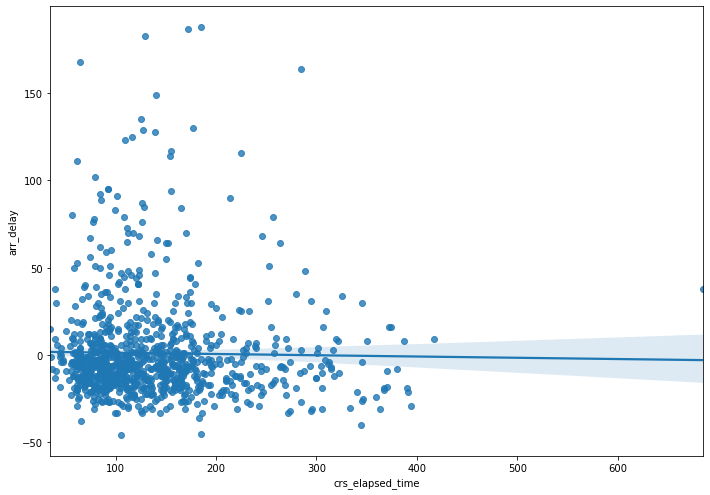

In [101]:
sns.regplot(x="crs_elapsed_time", y="arr_delay", data=DelayDate)
plt.show()

In [102]:
# I was thinking there may be some correlation here which it doesn't seem so. 

In [103]:
# I think we need to deal with delays and outliers on an aboslute basis meaning not normalize them.